Alunos: Eduardo da Maia Haak e Lukas Thiago Rodrigues

**Perguntas:**

1 - A principal história que esperamos é que pokémon do tipo Dragão são os mais difíceis para subir de nível. Uma descoberta surpreendente seria se não existesse correlação nenhuma entre o nível que o pokémon evolui e o grupo de crescimento. Uma descoberta esperada são que os pokémon insetos são os mais fáceis para subir de nível.


2 - Com os gráficos podemos ter uma ideia bem melhor dos comporamentos entre os valores, relações que talvez não sejam obvias apenas lidando com os números e em geral é mais fácil analizar as tendências e a dispersão dos valores com um recurso visual como os gráficos.

3 - O público, dentre as 3 opções apresentadas, seria um colega técnico, nesse caso um game designer que tem a tarefa de balancear o jogo ou criar novas criaturas. A resposta informa os tipos de gráficos já que diferentes pessoas tem diferentes focos e formas de entender e trabalhar com os dados, por exemplo, um colega de análise se interessaria por algo bem mais técnico e detalhado do que um CEO, que se importa mais com os resultados gerais da análise.

4 - Nossa hipótese será que os dados estarão concentrados mais para o meio, já que a grande parte parte dos pokémon são medianos, e portanto demorariam um tempo mediano para subir de level.

5 - Pois isso nos permite a detectar padrões, outliers e enviesamentos inerentes aos dados, que são importantes de serem identificados antes da análise para não chegar a conclusões errôneas sobre relações de dados sendo que essas distruibuições já se fazem presentes sem relações.

6 - Como dito anteriormente, espera-se que os dados fiquem mais concentrados entre os grupos medianos medium-slow (1,059,860) e medium-fast (1,000,000), e além disso os dados dessa coluna específicamente são separados entre 6 grupos, então na verdade nós esperamos que hajam 2 picos nesse gráfico. Significaria apenas que nossa hipótese está correta.

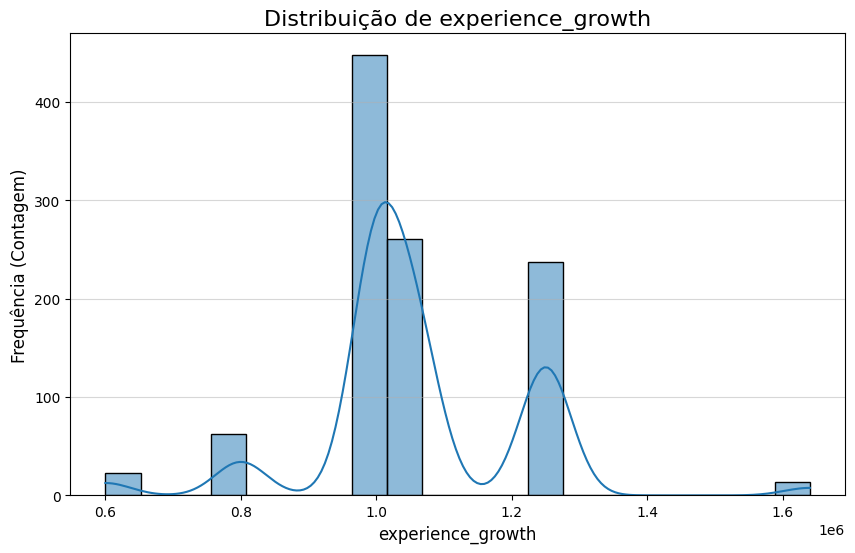

In [3]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregue seu dataset LIMPO da aula anterior
df = pd.read_csv('../data/pokemon_finalizado.csv')

# --- Histograma: Para ver a distribuição de uma variável numérica ---

# Pergunta de exemplo: "Como o crescimento de esperiência está distribuido?"
coluna_numerica = 'experience_growth'
if coluna_numerica in df.columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[coluna_numerica], kde=True, bins=20) # kde=True adiciona uma linha de densidade
  plt.title(f'Distribuição de {coluna_numerica}', fontsize=16)
  plt.xlabel(coluna_numerica, fontsize=12)
  plt.ylabel('Frequência (Contagem)', fontsize=12)
  plt.grid(axis='y', alpha=0.5)
  plt.show()
else:
  print(f"A coluna '{coluna_numerica}' não foi encontrada. Verifique o nome da coluna.")

Interpretação do gráfico:

O histograma mostra que a maioria dos pokémon estão concentrados na metade, o que representa os grupos medium-slow e medium-fast.

7 - Vamos pegas as variáveis 'capture_rate' e 'base_total' que acreditamos estarem relacionadas no sentido de quanto mais forte o pokémon, mais difícil é de capturá-lo. Essa é uma relação positiva e forte.

8 - Provavelmente não seria o caso de não haver relação, já que pra isso acontecer nós precisariamos creer que os desenvolvedores da Game Freak não são muito bons no trabalho deles, e longe de nós insinuar isso. O que poderiamos concluir portanto é que a relação é mais complexa do que pensávamos e envolve mais variáveis.

9 - Um plot muito distante significa que há um fator prático, talvez uma outra variável que precisamos considerar ou circustâncias além dos dados coletados que explicam a discrepância. Exemplo: Eternatus, ele é um pokémon lendário com 690 de status base e uma taxa de captura de 255 (100%), e isso se deve ao fato dele ser capturado durante um evento scriptado no jogo, e isso é algo que os dados não podem nos revelar. (Nota: o Eternatus não está na tabela pois ele foi introduzido após a coleta desses dados, mas é um bom exemplo)

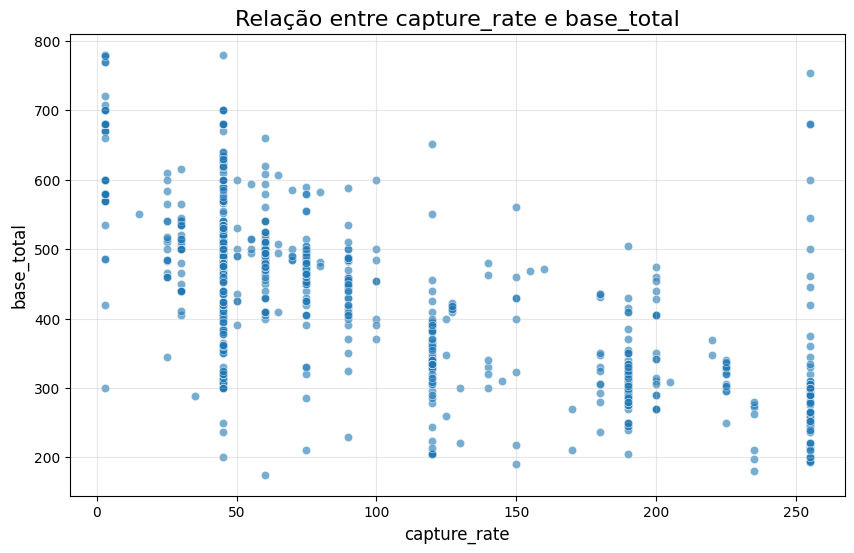

In [4]:
# --- Scatter Plot: Para ver a relação entre DUAS variáveis numéricas ---
# Pergunta de exemplo: "Pokémon com maior status são mais dificeis de capturar?"
df = pd.read_csv('../data/pokemon_finalizado.csv')

var_x = 'capture_rate' # (eixo X)
var_y = 'base_total' # (eixo Y)

if var_x in df.columns and var_y in df.columns:
  plt.figure(figsize=(10, 6))
  sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.6)
  plt.title(f'Relação entre {var_x} e {var_y}', fontsize=16)
  plt.xlabel(var_x, fontsize=12)
  plt.ylabel(var_y, fontsize=12)
  plt.grid(True, alpha=0.3)
  plt.show()
else:
  print(f"Verifique se as colunas '{var_x}' e '{var_y}' existem no seu dataset.")

Interpretação do gráfico:

O gráfico de dispersão mostra que existem pokemon com status base altos que são que são bem fáceis de capturar, e isso vai de encontro ao que foi dito anteriormente, são eventos scriptados pelo próprio jogo.

10 - Vamos pegar as variáveis 'experience_growth' e 'base_total'. Acreditamos que os dados estarão concentrados entre os grupos medianos medium-slow (1,059,860) e medium-fast (1,000,000). Porque a maioria dos pokémon tem um status base muito parecido, e concentrando neesas duas categorias é uma forma de balancear os pokémon.

11 - O intervalo interquartil, por design, nos mostra onde a metade dos dados está concentrado, e por consequência quando posto em um gráfico ele nos mostra a amplitude desses 50% e basicamente definem onde se encontram os *outliers*. Uma base total alta em 'fast' e uma base total baixa em 'slow' seriam um insight interessante, pois ira contra o que assumimos a respeito dessa distruibuição.

12 - Isso mostra que no geral, os dois grupos são parecidos. No entanto, os bigodes longos sugerem que os dados de um dos grupos estão mais dispersos, ou seja, apresentam uma maior variação dentro do intervalo considerado "normal". Além disso, a presença de vários outliers nesse mesmo grupo reforça a ideia de que há mais casos extremos ou comportamentos atípicos.

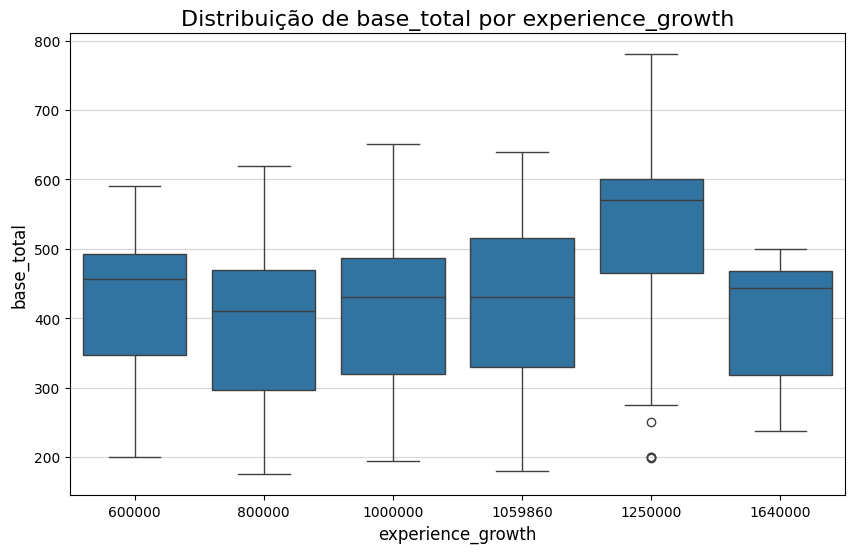

In [5]:
# --- Boxplot: Para comparar uma variável numérica entre diferentes categorias ---
# Pergunta de exemplo: "Quantos pokémon tem em cada grupo de experiência?"

df = pd.read_csv('../data/pokemon_finalizado.csv')

var_categorica = 'experience_growth' # (eixo X, categórica)
var_numerica = 'base_total' # (eixo Y, numérica)

if var_categorica in df.columns and var_numerica in df.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[var_categorica], y=df[var_numerica])
  plt.title(f'Distribuição de {var_numerica} por {var_categorica}', fontsize=16)
  plt.xlabel(var_categorica, fontsize=12)
  plt.ylabel(var_numerica, fontsize=12)
  plt.grid(axis='y', alpha=0.5)
  plt.show()
else:
  print(f"Verifique se as colunas '{var_categorica}' e '{var_numerica}' existem no seu dataset.")


Interpretação de Exemplo:

O boxplot revela claramente uma constância, quanto maior o status, maior é o grupo de expêriencia. A única categoria a apresentar outliers é 'slow' (1250000) e isso provavelmente se deve ao fato de haverem pré-evoluções do pokémon muito fortes mas que não são tão fortes antes de evoluir. Isso é perceptível pela presença de pokémon com status base baixos em todas as categorias.

Outras anomalias são as categorias 'erratic' (600000) e 'fluctuating' (1640000) que apesar de suas posições nos gráficos, na verdade são as categorias mais lenta de level up e mais rápida, respecivamente. O motivo delas terem quantidades de xp totais não condizentes é por que elas compensam sua velocidade/lentidão nos últimos níveis (level 90 - 100), onde elas se tornam o oposto da velocidade que elas tinham anteriormente. Além disso, esses dois grupos apresentam poucos membros, o que dificulta a realização de uma análise objetiva.